In [8]:
import pandas as pd

# Ruta al archivo CSV
file_path = '../bases/pobreza-municipal-puebla.csv'

# Cargar los datos
data = pd.read_csv(file_path)

# Eliminar espacios al inicio y al final de los nombres de las columnas
data.columns = data.columns.str.strip()

# Mostrar las primeras filas para revisión
#print(data.head())

# Limpiar datos faltantes
data_clean = data.dropna()

# Convertir datos a formato adecuado si es necesario
#data_clean['Población 2020'] = pd.to_numeric(data_clean['Población 2020'], errors='coerce')
#data_clean['Población en situación de pobreza 2020'] = pd.to_numeric(data_clean['Población en situación de pobreza 2020'], errors='coerce')

# Convertir la columna 'Clave municipio' a cadena de texto
data_clean['Clave municipio'] = data_clean['Clave municipio'].astype(str)

# Quitar solo el prefijo '21' de las claves de municipio después de eliminar los valores nulos
data_clean['Clave municipio'] = data_clean['Clave municipio'].str.replace('^21', '', regex=True)

# Renombrar la columna con "CVE_MUN"
data_clean = data_clean.rename(columns={'Clave municipio': 'CVE_MUN'})

# Guardar los datos limpios para su uso en D3.js
data_clean.to_csv('../bases/clean_poverty_data.csv', index=False)

# Imprimir los datos limpios
print(data_clean.tail())



     Clave entidad Entidad CVE_MUN    Municipio Población 2015  \
212             21  Puebla     213  Zihuateutla           5262   
213             21  Puebla     214  Zinacatepec           5105   
214             21  Puebla     215   Zongozotla           1540   
215             21  Puebla     216    Zoquiapan            893   
216             21  Puebla     217    Zoquitlán           8172   

     Población 2020  Población en situación de pobreza 2010  \
212            5079                               80.531218   
213            5372                               79.377373   
214            1227                               92.797806   
215             809                               86.210641   
216            8308                               95.105849   

    Población en situación de pobreza 2015  \
212                              80.938371   
213                               81.97348   
214                              93.987752   
215                              89.3066

CRS transformado a EPSG:4326
Valores nulos en CVE_MUN en el GeoDataFrame original: 0
Primeras filas del GeoDataFrame disuelto:
                                                  geometry CVEGEO CVE_ENT  \
CVE_MUN                                                                     
001      POLYGON ((-97.93474 19.16853, -97.93186 19.166...  21001      21   
002      POLYGON ((-97.28524 20.19058, -97.28532 20.190...  21002      21   
003      MULTIPOLYGON (((-98.20154 18.04097, -98.20132 ...  21003      21   
004      POLYGON ((-97.80525 19.11264, -97.80434 19.112...  21004      21   
005      POLYGON ((-98.67927 18.81621, -98.67820 18.815...  21005      21   

            NOMGEO  
CVE_MUN             
001        Acajete  
002        Acateno  
003        Acatlán  
004      Acatzingo  
005       Acteopan  


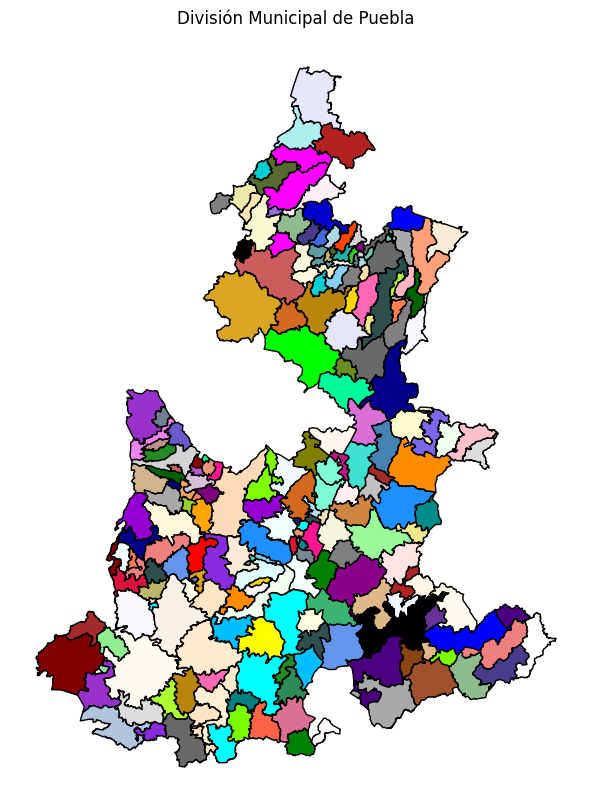

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Cargar el Shapefile
gdf = gpd.read_file("../bases/21mun.shp")

# Verificar y transformar el CRS a EPSG:4326 si es necesario
if gdf.crs.to_string() != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)
    print("CRS transformado a EPSG:4326")
else:
    print("CRS ya está en EPSG:4326")

# Verificar si hay valores nulos en la clave de municipio
print("Valores nulos en CVE_MUN en el GeoDataFrame original:", gdf['CVE_MUN'].isnull().sum())

# Disolver los polígonos por 'CVE_MUN' si no hay valores nulos
if gdf['CVE_MUN'].isnull().sum() == 0:
    municipal_boundaries = gdf.dissolve(by='CVE_MUN')
    print("Primeras filas del GeoDataFrame disuelto:")
    print(municipal_boundaries.head())
else:
    print("No se puede disolver debido a valores nulos en 'CVE_MUN'")

# Generar colores aleatorios para cada municipio
colores_municipios = list(mcolors.CSS4_COLORS.values())
n_colores = len(municipal_boundaries)
if n_colores > len(colores_municipios):  # Si hay más municipios que colores en la lista, repite la lista
    colores_municipios *= (n_colores // len(colores_municipios) + 1)
colores_municipios = colores_municipios[:n_colores]  # Limitar la lista al número de municipios

# Visualización rápida con Matplotlib para verificar los datos
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
municipal_boundaries.plot(ax=ax, edgecolor='k', color=colores_municipios)
plt.title('División Municipal de Puebla')
plt.axis('off')
plt.show()

# Guardar el resultado como GeoJSON
municipal_boundaries.to_file("../bases/21m.geojson", driver='GeoJSON')
